Truth be told, I really know jack shit about machine learning. It's just been presented to me in bits and pieces. I KNOW they require a lot of data to do anything useful, and that formatting the data is "90%" of the battle. But can I really just throw data at a machine and tell it to learn? Let's find out!

I think we stil have a ways to go. Is this a classification problem? I think we'll need to look at each article itself for more information. Then we can feed each article through a motherfucking shit cock.

OKAY SO HERE'S WHAT I THINK

I THINK THAT THE PRESS RELEASE OR ANY NEWS HAS THE POTENTIAL TO CAUSE A SHORT TERM SPIKE OR DECLINE IN PRICES THAT IS OUTSIDE OF THE NORMAL UPS AND DOWNS OF LONG TERM TRADING. I THINK THAT IN MOST CASES THE EFFECT WOULD BE TEMPORAL AND DISSIPATE AS THE LONG TERM BEHAVIOR BECOMES MORE RELEVANT. 

BUT HOW DO YOU PREDICT IT? HOW SHORT TERM DO YOU GO?

Here's what I think, based on how I interpret things: I doubt Beautiful Soup alone will be able to tell me if a press release is important. In the case of announcing earnings coming soon, that is only useful if I can also look at earnings in a different way. But for each company it'll probably be different.

(Picking up on 12/5/2021)
I think the problem really is a classification one. We classify what type of article the news release is, but more abstractly we classify how we think it will affect the price. It makes sense that because of word restrictions there may be many repeated words. There is also going to need to be a determinant for value-based data from a headline such as the "20M" in an example headline "Company reports loss of 20M". Before we get there we need to effectively parse the text surrounding it.

The issue is that in order to train the model it needs to know what it's looking at, a 'class' that is being fed into it. I think to start, the class should be a static predictor as to whether or not the stock went up or down in the short term. 

OTHER THINGS TO IMPLEMENT
More variable recording. volatility especially, both the VIX and the beta (lower beta is better), scheduled vs unscheduled news, market cap (smaller better)

In [24]:
# imports
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from string import digits

filedata=pd.read_csv('newsreleases_071421.csv', names=['tick','esttime','headline','link'])
timedata=pd.read_csv('newsreleases_071421_FULLTIME.csv')
df = pd.merge(filedata, timedata, on='tick')


# preprocessing
def preproc(data,headline_index='headline'):
    # for now just  make everything lower and remove any numbers and drop nans
    data[headline_index]=data[headline_index].str.lower()
    remove_digits = str.maketrans('','', digits)
    data[headline_index]=data[headline_index].str.translate(remove_digits)
    return data.dropna()
df=preproc(df)

In [2]:
# filter by string
keyword='covid-19'
df[df['headline'].str.contains(keyword).dropna()]
# generate 
vectorizer = TfidfVectorizer(stop_words='english')
x=vectorizer.fit_transform(df['headline'].dropna())
df_new = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names())
df_new
# these will become part of the x values in the model

,aadi,aaic,ab,abbott,abbvie,abcam,abcellera,abeona,ability,abl,...,zapi,zeneo,zenith,zentaris,zephyr,zilebesiran,zo,zones,zynrelef,zynteglo
0,0.0,0.0,0.0,0.0,0.259107,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.00000,0.463164,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.46139,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.300574,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
929,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
930,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
931,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
932,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
datetime.now().timestamp()

1639108054.300451

[*********************100%***********************]  1 of 1 completed


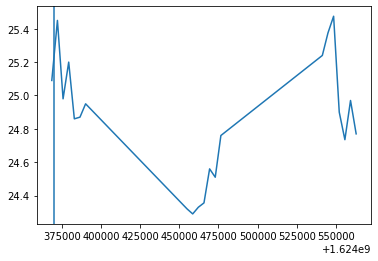

In [31]:
# we want to categorize each based on stock data, the 'class' will be whether or not the stock goes up in the short term
# for now, we will define the short term as approximately one day after the news breaks
# if the stock has a more dramatic (longer) effect on prices, this at least gives a decent estimate of early performance

# the following are imports from previous development
from dateutil import parser
import pandas as pd
import yfinance as yf
from datetime import datetime, time, timedelta
import matplotlib.pyplot as plt

def getdatetime(dtime):
    return parser.parse(dtime,tzinfos={"EST":-5*3600, "EDT":-4*3600})
def ismarkethours(timeobj):
    # takes time object
    # starts at 9:30-4:00 weekdays
    timeobj=getdatetime(timeobj)
    openbell = time(9,30)
    closebell= time(16,0)
    # ignoring holidays for now, will become exception-based if statement later
    if timeobj.weekday()<5: # if not on a weekend
        return openbell<timeobj.time() and closebell>timeobj.time()
def getpricedata(ticker, time, daybuffer=3, hourbuffer=0, interval='1h'):
    # returns price data around certain time, 
    # which should be based on press release
    # buffer variables expand or constrict range of dates retrieved
    datetime=getdatetime(time) # assume they are NOT coming in as datetime obj
    delta = timedelta(days=+daybuffer, hours=+hourbuffer)
    dt_up = datetime+delta
    dt_dn = datetime
    dt_start = "{}-{}-{}".format(dt_dn.year, dt_dn.month, dt_dn.day)
    dt_end = "{}-{}-{}".format(dt_up.year, dt_up.month, dt_up.day)
    data=yf.download(ticker, start=dt_start, end=dt_end, interval=interval)
    data=data.reset_index()
    data.rename(columns={'index':'datetime'}, inplace=True)
    data['datetime_conv']=[dt.timestamp() for dt in data['datetime']]
    return data

# test to see that it works
ii=20
df_tick=df.iloc[ii].tick
df_time=df.iloc[ii].time
data=getpricedata(df_tick, df_time, daybuffer=3)
if ismarkethours(df_time):
    plt.plot(data['datetime_conv'],data['Adj Close'])
    plt.axvline(getdatetime(df_time).timestamp())
#data

In [26]:
data

,datetime,Open,High,Low,Close,Adj Close,Volume,datetime_conv
0,2021-07-08 09:30:00-04:00,10.120,10.6300,10.120,10.590,10.590,6243,1.625751e+09
1,2021-07-08 10:30:00-04:00,10.340,10.4200,10.250,10.250,10.250,4178,1.625755e+09
2,2021-07-08 11:30:00-04:00,10.250,10.3600,10.200,10.305,10.305,3060,1.625758e+09
3,2021-07-08 12:30:00-04:00,10.305,10.5400,10.305,10.430,10.430,1698,1.625762e+09
4,2021-07-08 13:30:00-04:00,10.420,10.5100,10.340,10.360,10.360,2682,1.625765e+09
5,2021-07-08 14:30:00-04:00,10.290,10.2900,10.200,10.240,10.240,2055,1.625769e+09
6,2021-07-08 15:30:00-04:00,10.240,10.3200,10.240,10.270,10.270,8118,1.625773e+09
7,2021-07-09 09:30:00-04:00,10.430,10.6399,10.405,10.450,10.450,0,1.625837e+09
8,2021-07-09 10:30:00-04:00,10.370,10.5100,10.230,10.510,10.510,3236,1.625841e+09
9,2021-07-09 11:30:00-04:00,10.395,10.4800,10.385,10.385,10.385,1972,1.625845e+09


In [19]:
# get count for reference. If many results fall outside market hours (they do, a majority of set)
# then we need to grade how far outside hours each article is in order to determine relevancy
# for example, 9am on a trading day is okay, but 5pm on a friday gives the after market plenty of time to react
count=0
for ii in range(len(df)):
    if ismarkethours(df.iloc[ii].time):
        count+=1
count

72

In [27]:
# now we can estimate movement
# we can apply a compliucated lambda function and apply it to all rows in the dataframe
# for now we will only use rows that occur within market hours
#df = df.assign(Markethrs=lambda x: (ismarkethours(x['time'])))
import os
from time import sleep as sleepy
data['markethrs'] = data['datetime'].apply(ismarkethours)
#df = df.assign(Percentage = lambda x: (x['Total_Marks'] /500 * 100))
df_market=df[df['markethrs']==True]
for idx, row in df_market.iterrows():
    print(idx, row['tick'], row['time'])
    newstime=getdatetime(row['datetime'])
    data=getpricedata(row['tick'], row['time'], daybuffer=3)
    plt.plot(data['datetime_conv'],data['Adj Close'])
    plt.axvline(newstime.timestamp())
    #sleepy(2)
    plt.pause(2)
    

TypeError: Parser must be a string or character stream, not Timestamp

In [23]:
# Need to be able to pull datetime from news publishing and apply it to this
# pd timestamp works well
#data['datetime_p']=getdatetime(data['datetime'])
#type(data['datetime'][2])
#pd.Timestamp(newstime)
delta = pd.Timedelta(2, 'days')
#pd.Timestamp(newstime)+delta
newstime=getdatetime(row['time'])
data=getpricedata(row['tick'], row['time'], daybuffer=3)
# filter to within specific timeframe
data_selected=data[(data['datetime']>pd.Timestamp(newstime)) & (data['datetime']<(pd.Timestamp(newstime)+delta))]

# normalize values
# should normalize within the maximum high and lowest low
minlo=min(data_selected['Low'])
maxhi=max(data_selected['High'])

adjclose=data_selected['Adj Close']

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- TLC: No data found, symbol may be delisted


KeyError: 'datetime'

In [22]:
import sklearn
scaler=sklearn.preprocessing.MinMaxScaler()
# just do it manually
output_var = data_selected['Adj Close']
features = ['Open','High','Low', 'Volume']
feature_transform=scaler.fit_transform(data_selected[features])
feature_transform=pd.DataFrame(columns=features, data=feature_transform,index = data_selected['datetime'])
feature_transform.head()

NameError: name 'data_selected' is not defined

In [ ]:
filedata.dropna()[filedata['2'].str.contains("boston").dropna()]